In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

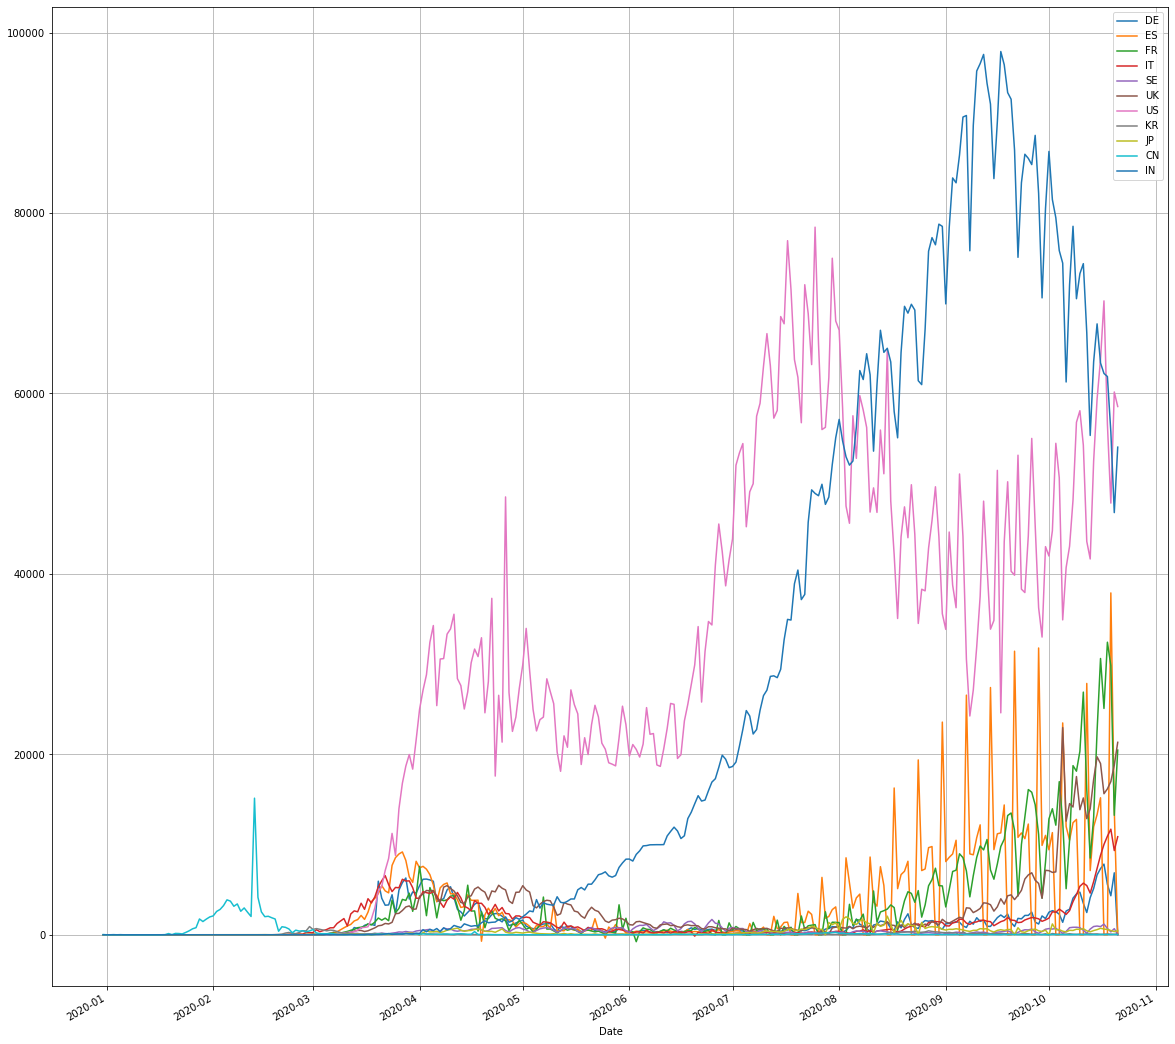

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

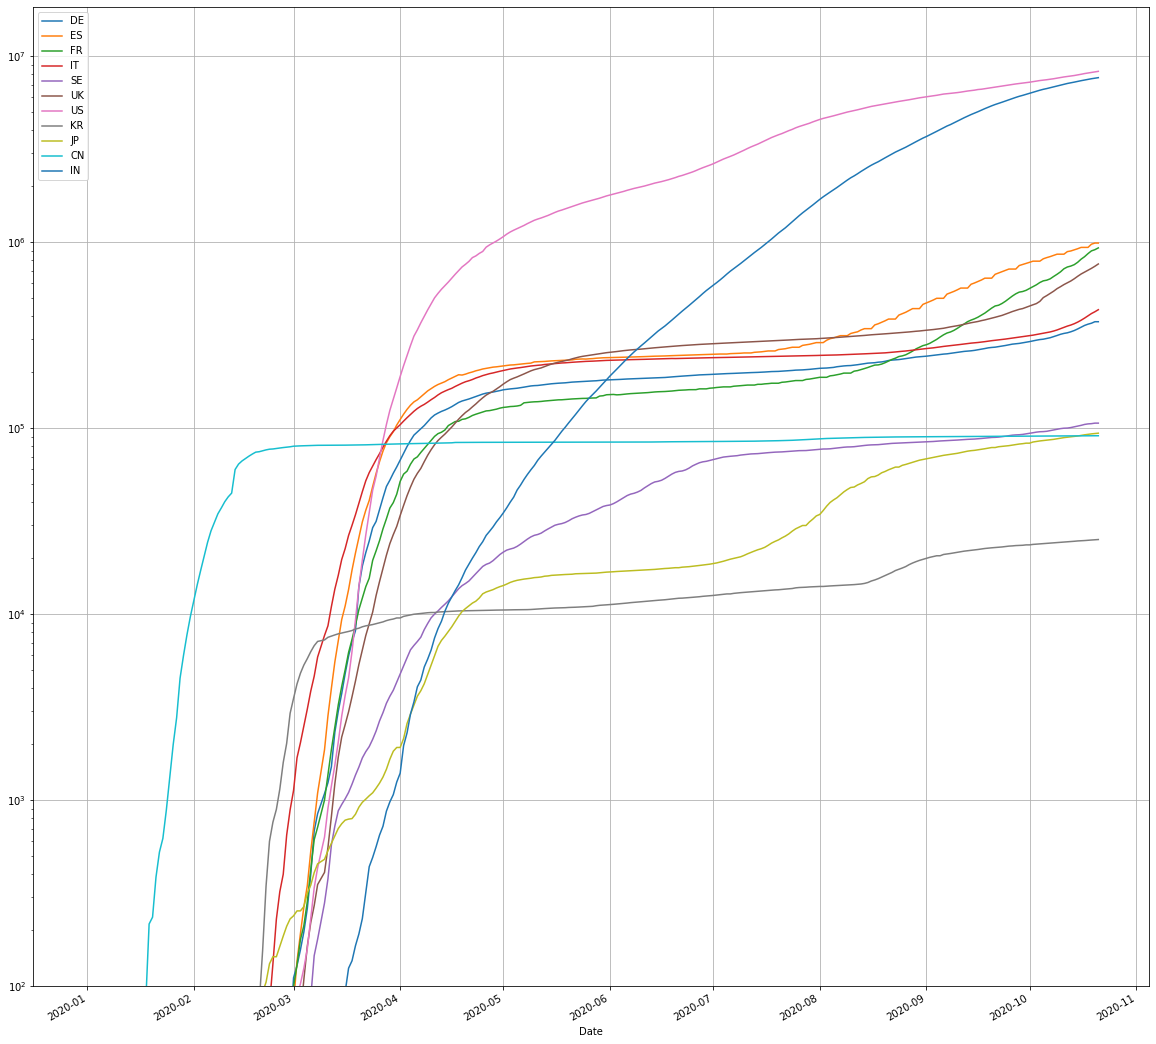

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

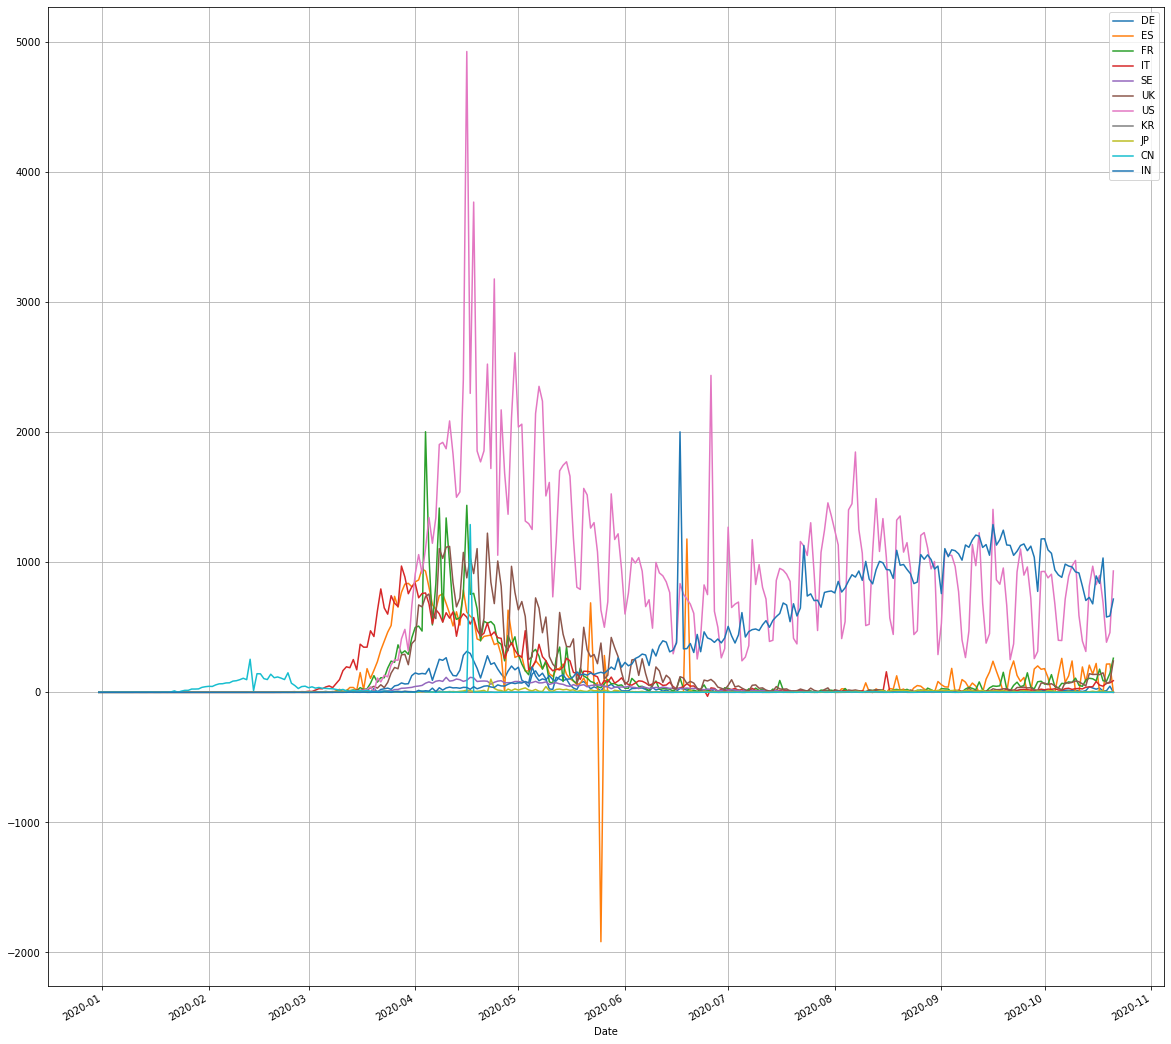

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

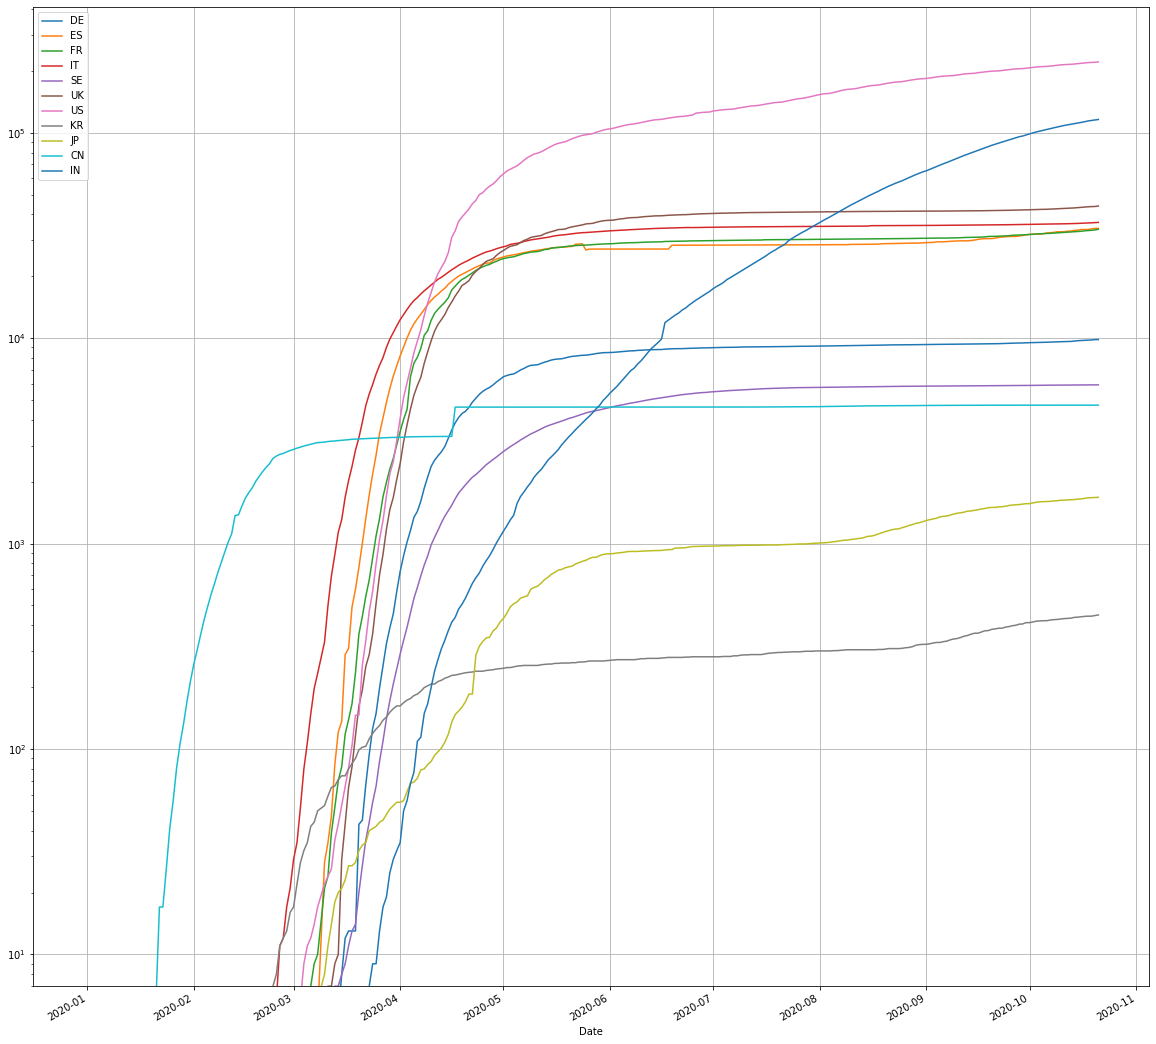

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-10-07,2828.0,10491.0,10489,2677,786,14542,43062,114,496,15,72049
12,2020-10-08,4058.0,12423.0,18746,3677,831,14162,48182,69,477,22,78524
11,2020-10-09,4516.0,12788.0,18129,4458,836,17540,56800,54,619,39,70496
10,2020-10-10,4721.0,0.0,20339,5372,783,13864,58082,72,594,29,73272
9,2020-10-11,3483.0,0.0,26896,5724,509,15165,54271,58,679,21,74383
8,2020-10-12,2467.0,27856.0,16101,5456,161,12872,43597,97,435,34,66732
7,2020-10-13,4122.0,7118.0,8505,4619,637,13972,41653,102,326,18,55342
6,2020-10-14,5132.0,11970.0,12993,5898,916,17232,52517,84,467,28,63509
5,2020-10-15,6638.0,13318.0,22591,7332,969,19724,59386,99,570,11,67708
4,2020-10-16,7334.0,15186.0,30621,8803,906,18978,63785,47,721,36,63371


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-10-07,306031.0,835468.0,634353.0,328771.0,96911.0,530053.0,7501491.0,24105.0,86510.0,90622.0,6757131.0
2020-10-08,310089.0,847891.0,653099.0,332448.0,97742.0,544215.0,7549673.0,24174.0,86987.0,90644.0,6835655.0
2020-10-09,314605.0,860679.0,671228.0,336906.0,98578.0,561755.0,7606473.0,24228.0,87606.0,90683.0,6906151.0
2020-10-10,319326.0,860679.0,691567.0,342278.0,99361.0,575619.0,7664555.0,24300.0,88200.0,90712.0,6979423.0
2020-10-11,322809.0,860679.0,718463.0,348002.0,99870.0,590784.0,7718826.0,24358.0,88879.0,90733.0,7053806.0
2020-10-12,325276.0,888535.0,734564.0,353458.0,100031.0,603656.0,7762423.0,24455.0,89314.0,90767.0,7120538.0
2020-10-13,329398.0,895653.0,743069.0,358077.0,100668.0,617628.0,7804076.0,24557.0,89640.0,90785.0,7175880.0
2020-10-14,334530.0,907623.0,756062.0,363975.0,101584.0,634860.0,7856593.0,24641.0,90107.0,90813.0,7239389.0
2020-10-15,341168.0,920941.0,778653.0,371307.0,102553.0,654584.0,7915979.0,24740.0,90677.0,90824.0,7307097.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-10-07,16.0,76.0,66,28,2,76,717,3,3,0,986
12,2020-10-08,16.0,126.0,80,31,4,70,892,2,8,0,971
11,2020-10-09,11.0,241.0,76,22,3,77,972,1,3,0,964
10,2020-10-10,15.0,0.0,109,28,1,87,1014,2,8,0,926
9,2020-10-11,11.0,0.0,54,29,4,81,590,2,3,0,918
8,2020-10-12,6.0,195.0,46,26,3,65,394,1,2,0,816
7,2020-10-13,13.0,80.0,95,39,1,50,314,1,5,0,706
6,2020-10-14,43.0,209.0,108,41,2,143,817,4,4,0,730
5,2020-10-15,33.0,140.0,104,43,1,137,970,1,8,0,680
4,2020-10-16,24.0,222.0,88,83,1,138,828,2,4,0,895


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-10-07,9562.0,32562.0,32356.0,35897.0,5900.0,42445.0,210905.0,424.0,1604.0,4716.0,104555.0
2020-10-08,9578.0,32688.0,32436.0,35928.0,5904.0,42515.0,211797.0,426.0,1612.0,4716.0,105526.0
2020-10-09,9589.0,32929.0,32512.0,35950.0,5907.0,42592.0,212769.0,427.0,1615.0,4716.0,106490.0
2020-10-10,9604.0,32929.0,32621.0,35978.0,5908.0,42679.0,213783.0,429.0,1623.0,4716.0,107416.0
2020-10-11,9615.0,32929.0,32675.0,36007.0,5912.0,42760.0,214373.0,431.0,1626.0,4716.0,108334.0
2020-10-12,9621.0,33124.0,32721.0,36033.0,5915.0,42825.0,214767.0,432.0,1628.0,4716.0,109150.0
2020-10-13,9634.0,33204.0,32816.0,36072.0,5916.0,42875.0,215081.0,433.0,1633.0,4716.0,109856.0
2020-10-14,9677.0,33413.0,32924.0,36113.0,5918.0,43018.0,215898.0,437.0,1637.0,4716.0,110586.0
2020-10-15,9710.0,33553.0,33028.0,36156.0,5919.0,43155.0,216868.0,438.0,1645.0,4716.0,111266.0
